# Model and Metadata Analysis

In [181]:
import pandas as pd
import numpy as np 
import os
import sys

sys.path.append("..")
DATA_DIR = "~/Desktop/code/data/"

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns

## Taxonomy

### Taxonomy of Training Set

In [26]:
# Training output with clustering and classification
train_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'train-output.csv'))

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = train_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
train_taxa = pd.merge(left=train_df, right=bd_taxonomy, on="taxon_id", how="left")
train_taxa = train_taxa.drop_duplicates()

#train_taxa.to_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"), index=False)
train_taxa.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     8.782784     5.898263     5.757063     5.833907     4.608732   
1     8.782784     5.898263     5.757063     5.833907     4.608732   
2     8.782784     5.898263     5.757063     5.833907     4.608732   
3     9.710889     6.151599     5.426264     5.512591     4.915431   
4     9.710889     6.151599     5.426264     5.512591     4.915431   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     5.178930     5.552777     3.216833     6.436071      3.635296  ...   
1     5.178930     5.552777     3.216833     6.436071      3.635296  ...   
2     5.178930     5.552777     3.216833     6.436071      3.635296  ...   
3     4.459331     5.302310     4.438601     5.520104      6.693969  ...   
4     4.459331     5.302310     4.438601     5.520104      6.693969  ...   

   KMeans Cluster  taxon_id  Media Cluster    domain          phylum  \
0             132     100.0            9.0  Bacteria  Proteobacteria   
1             132     100.0            9.0  Bacteria  Actinobacteria   
2             132     100.0            9.0  Bacteria  Actinobacteria   
3             127     100.0            9.0  Bacteria  Proteobacteria   
4             127     100.0            9.0  Bacteria  Actinobacteria   

                 class            order            family             genus  \
0  Alphaproteobacteria  Caulobacterales  Caulobacteraceae  Phenylobacterium   
1       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   
2       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   
3  Alphaproteobacteria  Caulobacterales  Caulobacteraceae  Phenylobacterium   
4       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   

                    species  
0  Phenylobacterium panacis  
1     Mycobacterium triplex  
2    Mycobacterium branderi  
3  Phenylobacterium panacis  
4     Mycobacterium triplex  

[5 rows x 42 columns]

In [31]:
print(len(train_df), "training samples,", len(train_taxa), "taxonomic classifications")
print("Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping")

8464 training samples, 25006 taxonomic classifications
Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping


### Taxonomy of KNearestNeighbors

In [3]:
# Model output with clustering and classification
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = model_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
model_neighbors = pd.merge(left=model_df, right=bd_taxonomy, on="taxon_id", how="left")

model_neighbors.to_csv(os.path.join(DATA_DIR, "model", "test-taxa.csv"), index=False)
model_neighbors.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.566709     5.879142     5.020658     5.346295     4.943074   
1     9.566709     5.879142     5.020658     5.346295     4.943074   
2     9.566709     5.879142     5.020658     5.346295     4.943074   
3     9.566709     5.879142     5.020658     5.346295     4.943074   
4     9.566709     5.879142     5.020658     5.346295     4.943074   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
1     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
2     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
3     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
4     4.068261     5.094788     5.370132     3.575392      4.875126  ...   

   neighbor_media_id  taxon_id  media_cluster    domain          phylum  \
0                J84   38402.0            9.0  Bacteria  Proteobacteria   
1                J84   38402.0            9.0  Bacteria  Proteobacteria   
2               J237   75385.0            NaN  Bacteria     Thermotogae   
3               J256    1901.0            9.0  Bacteria  Actinobacteria   
4               J256    1901.0            9.0  Bacteria  Proteobacteria   

                   class              order               family  \
0    Gammaproteobacteria     Pasteurellales      Pasteurellaceae   
1  Epsilonproteobacteria  Campylobacterales   Campylobacteraceae   
2            Thermotogae      Thermotogales       Thermotogaceae   
3         Actinobacteria    Actinomycetales  Thermomonosporaceae   
4    Gammaproteobacteria     Pasteurellales      Pasteurellaceae   

             genus                                species  
0  Aggregatibacter  Aggregatibacter actinomycetemcomitans  
1    Campylobacter                 Campylobacter gracilis  
2       Thermotoga                    Thermotoga maritima  
3    Spirillospora                   Spirillospora albida  
4  Aggregatibacter  Aggregatibacter actinomycetemcomitans  

[5 rows x 47 columns]

## Model Visualization

Complete model output:

In [149]:
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-output.csv"))
#train["Media Cluster"] = train["Media Cluster"].astype(str)
test = pd.read_csv(os.path.join(DATA_DIR, "model", "test-output.csv"))
print(len(train), "training points,", len(test), "test points")

# Plot the training points
fig = px.scatter(
    data_frame = train,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "Media Cluster", 
    hover_data = ["taxon_id", "Target", "KMeans Cluster"], 
    opacity = 0.3
) 

# Add the test points as a scatter trace
fig.add_trace(
    go.Scatter(
        x=test["Component 30"],  # x coordinates
        y=test["Component 26"],  # y coordinates
        mode='markers',
        marker=dict(
            color="black",  
            size=5,  
            opacity=1.0 
        ),
        text=test["taxon_id"]  # marker hover text
    )
)

# Configure opacity slider
steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [i/20]}, [0]],  # Adjust opacity of the training points trace only (trace index [0])
        label=str(i/20)
    )
    steps.append(step)

sliders = [dict(
    active=1,  # Initial value corresponding to opacity=0.1 (i.e., 1st step)
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="30 Dimensions, Training & Test Model Outputs",
    template="plotly_white",
)

fig.show()

8464 training points, 247 test points


Model output subsets:

In [151]:
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv")) # comes from Bin metadata section, this was added post-
print(len(train), "training points,", len(test), "test points")

25006 training points, 1350 test points


In [153]:
# TRAINING SET ONLY

fig = px.scatter(
    data_frame = train,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "class",
    hover_data = ["taxon_id", "Target", "KMeans Cluster"],
    opacity = 0.1,
    title = "Class-Level Taxonomy, Training Set"
) 

steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle", args=[{"marker.opacity": [i/20]}, [0]], label=str(i/20))
    steps.append(step)
sliders = [dict(active=1, currentvalue={"prefix": "Opacity: "}, pad={"t": 50}, steps=steps)]

fig.update_layout(
    sliders=sliders,
    template="plotly_white",
)

fig.show()

In [154]:
# Weird formatting stuff for metadata
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"))
print(len(train), "training points,", len(test), "test points")

test["temp"] = test["temp"].astype(str)
test["ph"] = test["ph"].astype(str)

temp = test.copy()
temp["temp"] = temp["temp"].dropna()
temp_nan = temp["temp"].str.contains("nan")
temp = temp[~temp_nan]
temp["temp"] = temp["temp"].astype("f8")
print(len(temp), "points with temperature data")

ph = test.copy()
ph["ph"] = ph["ph"].dropna()
ph_nan = ph["ph"].str.contains("nan")
ph = ph[~ph_nan]
ph["ph"] = ph["ph"].astype("f8")
print(len(ph), "points with pH data")

25006 training points, 1350 test points
1180 points with temperature data
1180 points with pH data


In [156]:
# TEST SET ONLY

fig1 = px.scatter(
    data_frame = test,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "SiteID",
    hover_data = ["bin", "RF Classify"],
    opacity = 0.5,
    title = "SiteID, Test Set",
    template="plotly_white"
) 

fig2 = px.scatter(
    data_frame = temp,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "temp",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    opacity = 0.5,
    title = "Temperature, Test Set",
    template="plotly_white"
) 

fig3 = px.scatter(
    data_frame = ph,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "ph",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    opacity = 0.5,
    title = "pH, Test Set",
    template="plotly_white"
) 

fig1.show()
fig2.show()
fig3.show()

#TODO: sum or map across different major ions and trace elements

In [91]:
#TODO: make individual dataframes with .dropna() of each of these features to omit points with no data?

## Model EC & Cofactor Comparison

### EC Comparison

In [8]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

bins = ml_input["source"].str.contains("KBase")
db = ml_input[~bins]
mag = ml_input[bins]

db_ec = db["ec"].to_list()
mag_ec = mag["ec"].to_list()

ec_mask = mag["ec"].isin(db_ec)
overlap = mag[ec_mask]
unique = mag[~ec_mask]

overlap_list = overlap["ec"].to_list()
ovset = set(overlap_list)

unique_list = unique["ec"].to_list()
unset = set(unique_list)

print(len(ovset), "overlapping EC's", len(unset), "unique")

1518 overlapping EC's 305 unique


3875 training ECs, 1823 test ECs


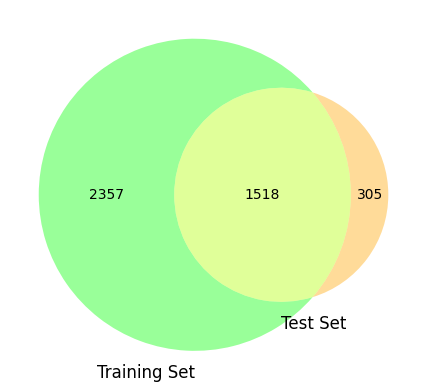

In [157]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

venn2(
    subsets=[
        set(db_ec),
        set(mag_ec)
    ],
    set_labels=[
        "Training Set",
        "Test Set"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

print(len(set(db_ec)), "training ECs,", len(set(mag_ec)), "test ECs")

In [10]:
tec = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = tec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

taxa_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(taxa_enzyme_counts)

# Plot the occurrence of enzymes across all of our selected taxa 
#fig = px.bar(taxa_enzyme_counts, x="Class", y="Total Count")
#fig.show()


  Group            Class  Total Count
0     1  Oxidoreductases       250577
1     2     Transferases       512583
2     3       Hydrolases       462458
3     4           Lyases       146148
4     5       Isomerases        99566
5     6          Ligases       141588
6     7     Translocases        48603


In [11]:
bec = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = bec["source"].str.contains("KBase")
bec = bec[bins]

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df2 = bec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df2['Group'] = enzyme_df2['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df2 = enzyme_df2.groupby('Group')['count'].sum().reset_index()
grouped_df2.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df2['Class'] = ec_class

bin_enzyme_counts = grouped_df2[['Group','Class','Total Count']]
print(bin_enzyme_counts)

# Plot the occurrence of enzymes across all of our selected taxa 
#fig = px.bar(bin_enzyme_counts, x="Class", y="Total Count")
#fig.show()

  Group            Class  Total Count
0     1  Oxidoreductases        19797
1     2     Transferases        43665
2     3       Hydrolases        18635
3     4           Lyases        11449
4     5       Isomerases         7521
5     6          Ligases         9864
6     7     Translocases         6191


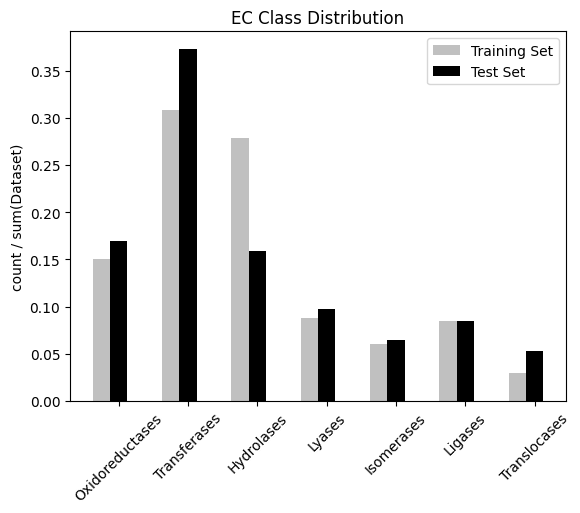

In [12]:
# Normalize counts
df1 = taxa_enzyme_counts.copy() 
sum1 = df1['Total Count'].sum(axis=0)
df1['Training_Proportion'] = df1['Total Count'].div(sum1)

df2 = bin_enzyme_counts.copy() 
sum2 = df2['Total Count'].sum(axis=0)
df2['Test_Proportion'] = df2['Total Count'].div(sum2)

N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Training_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = df2['Test_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='black') 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.ylabel("count / sum(Dataset)") 
plt.title("EC Class Distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set', 'Overlap')) 

plt.show() 

### Cofactor Comparison

In [13]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = ml_input["source"].str.contains("KBase")
bin_ec = ml_input[bins]

ec_list = bin_ec["ec"].to_list()
ec_list = set(ec_list)

print(len(ec_list), "unique bin ECs")

1823 unique bin ECs


In [14]:
# Retrieving bin cofactors
#import modules.cofactors as cofactors
#bin_cofactors = cofactors.ec2metals(ec_list)

#bin_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv"), index=False)
#bin_cofactors.head()

In [15]:
# Format ec2metals output
bin_cofactors = pd.read_csv((os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv")))
cofactors = bin_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

# List out all cofactors
CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), index=False) #SAVE

# Group cofactors by EC
grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv"), index=False) #SAVE

grouped_cofactors.head()

Query EC CofactorFinal
0    1.1.1.1      [Zn, Fe]
1  1.1.1.103          [Zn]
2  1.1.1.105          [Zn]
3  1.1.1.133          [Mg]
4   1.1.1.17          [Zn]

In [16]:
print(len(CofactorFinal), "ECs with cofactors, approximately", len(grouped_cofactors), "of which are cambialistic")

1226 ECs with cofactors, approximately 707 of which are cambialistic


In [17]:
co = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)

import plotly.express as px

fig = px.bar(
    data_frame = co.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="FENIX21 cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

In [18]:
cg = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv"), low_memory=False)

import plotly.express as px

fig = px.bar(
    data_frame = cg.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="FENIX21 cofactors (grouped by EC)"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

In [23]:
# Load dataframes
co = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
ct = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa.csv"), low_memory=False)

#Create, merge, format counts 
coct = co["CofactorFinal"].value_counts().reset_index()
sum1 = coct["count"].sum(axis=0)
coct['ratio1'] = coct['count'].div(sum1)
coct = coct.rename(columns={"count": "count1"})

ctct = ct["CofactorFinal"].value_counts().reset_index()
sum2 = ctct["count"].sum(axis=0)
ctct['ratio2'] = ctct['count'].div(sum2)
ctct = ctct.rename(columns={"count": "count2"})

cf_df = pd.merge(left=coct, right=ctct, on="CofactorFinal", how="left")
cf_df = cf_df.fillna(0)
cf_df.head()

CofactorFinal  count1    ratio1  count2    ratio2
0            Mg     305  0.248777     671  0.195228
1            Fe     214  0.174551     602  0.175153
2            Zn     157  0.128059     425  0.123654
3             S     127  0.103589     322  0.093686
4            Mn      93  0.075856     252  0.073320

In [24]:
x = cf_df["count1"].sum(axis=0)
y = cf_df["count2"].sum(axis=0)
print(x, "annotated bin cofactors", y, "annotated db cofactors")

1226 annotated bin cofactors 3406 annotated db cofactors


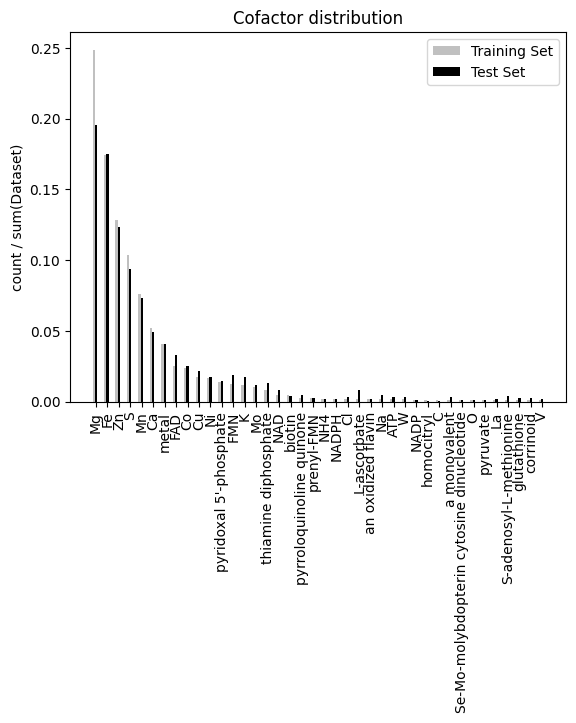

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 

data = cf_df.head(40) # Subset full dataframe; usual length is ~45 cofactors
N = 40
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

In [27]:
# NOTE: most "metal" annotations are vague "divalent metal cation", without a specific metal listed in UniProtKB

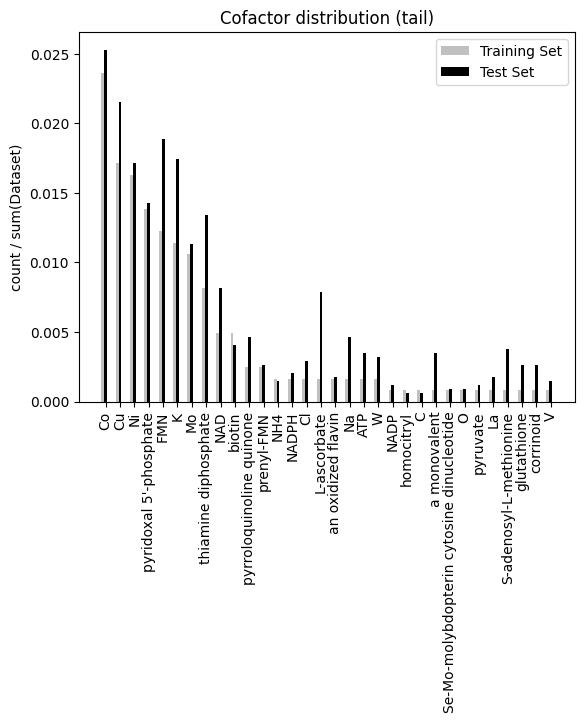

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 

n = 8 # number of highest abundance cofactors to omit
N = len(cf_df)-n
data = cf_df.iloc[n:n+N]
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution (tail)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

In [13]:
metals_df = cf_df.copy()

# Subset with ONLY metal cofactors:
metals = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-list.csv"))
metals_list = metals['Metals'].to_list()
mask = metals_df['CofactorFinal'].isin(metals_list)
metals_cf = metals_df[mask]

metals_cf.head()

CofactorFinal  count1    ratio1  count2    ratio2
0            Mg     305  0.248777     671  0.195228
1            Fe     214  0.174551     602  0.175153
2            Zn     157  0.128059     425  0.123654
4            Mn      93  0.075856     252  0.073320
5            Ca      64  0.052202     170  0.049462

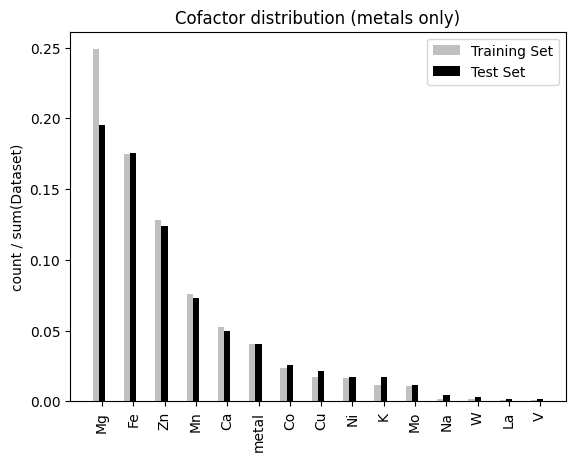

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

data = metals_cf
N = 15
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution (metals only)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

In [ ]:
# TODO: can investigate individual MAGs as ratios against either the training or test set

In [ ]:
cf = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
cf = cf[["Query EC", "CofactorFinal"]]
cf = cf.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor"})

taxa = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = taxa["source"].str.contains("KBase")
taxa = taxa[bins]

binco = pd.merge(left=taxa, right=cf, on="ec", how="left")
binco = binco[["taxon_id", "ec", "cofactor"]]
binco = binco.rename(columns={"taxon_id": "bin_name"})

binco.to_csv(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv"), index=False)
binco.head()

bin_name         ec cofactor
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297      NaN
1  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21      NaN
2  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K

In [ ]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data.dropna()
data_heatmap = data[["bin_name", "cofactor"]].drop_duplicates()
data_heatmap["count"] = 1

data_heatmap = data_heatmap.pivot(index="bin_name", columns="cofactor", values="count") #.pivot

import plotly.express as px
px.imshow(data_heatmap, width=1000, height=1000)

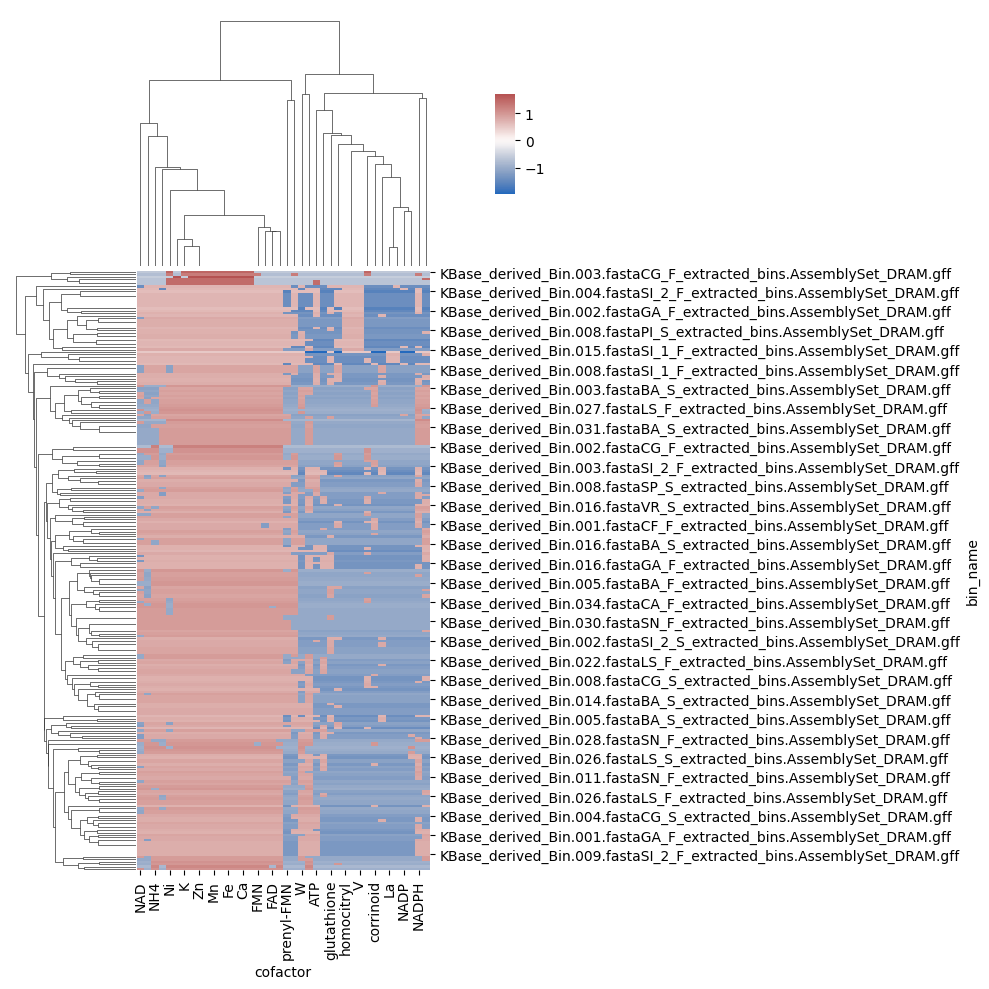

In [ ]:
import seaborn as sns

data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data[["bin_name", "cofactor"]].drop_duplicates()
data["count"] = 1
data = pd.pivot_table(data, values='count', index='bin_name', columns='cofactor')
data = data.fillna(0)

sns.clustermap(data, z_score=0, cmap="vlag", center=0, dendrogram_ratio=0.3, cbar_pos=(0.5, 0.8, 0.02, 0.10))

#cm = sns.clustermap(data)
#cm.cax.set_visible(False) # remove color bar for binary data

In [ ]:
# Most impactful features for model outputs
m4f = ["4.1.1.17", "1.9.3.1", "3.5.1.5", "3.2.1.20", "1.1.1.1", "3.2.1.22", "2.1.2.1", "3.5.3.6", "3.2.1.21"]
print(len(m4f), "important model features (04-Model-Eval)")

# Retrieving bin cofactors
import modules.cofactors as cofactors
m4f_cofactors = cofactors.ec2metals(m4f)

# Format
cofactors = m4f_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance.csv"), index=False) #SAVE

grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance-grouped.csv"), index=False) #SAVE

grouped_cofactors.head()

9 important model features (04-Model-Eval)


100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


Query EC      CofactorFinal
0   1.1.1.1           [Zn, Fe]
1  3.2.1.20          [NAD, Mn]
2  3.2.1.22  [Mg, Ca, Mn, NAD]
3   3.5.1.5               [Ni]

In [56]:
#TODO: assign +/- impact to feature importance cofactors
#TODO: evaluate feature importance of 05-Model-Test and visualize those components

## MAG Analysis

In [82]:
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

f_env = pd.read_csv(os.path.join(DATA_DIR, 'MAGs', 'FENIX21', 'envdata.csv'))
f_env = f_env.astype(str)
env_subset = f_env[["SiteID", "site_name", "waterType", "temp", "ph", "spc","sal", "alk_tot"]]
env_subset

SiteID                 site_name waterType   temp    ph    spc     sal  \
0      AS  Acqua sauna lido scoglio       nan   65.0  5.96    nan    36.0   
1      BA                   Bagnone       nan   64.0   7.0    nan     nan   
2      CA             Acqua Cantani   Ca-HCO3  17.48  6.34  2.757    0.14   
3      CF    Terme Caracciolo Forte   Ca-HCO3   53.0  5.36  3.067   0.156   
4      CG            Capasso geyser     Na-Cl   47.2  6.51   9.78   0.528   
5      CP        Capasso parcheggio       nan   46.9   nan  9.932     nan   
6      FE          Sorgente Ferrata   Ca-HCO3  15.22  6.49  1.946     0.1   
7      GA         Grotta dell'acqua     Na-Cl   32.6  6.41    nan    10.0   
8      LS           Lido lo scoglio     Na-Cl   47.8  6.12    nan    21.0   
9      ML       Madonna dei Lattani   Ca-HCO3   15.0   8.6   0.22   0.011   
10     PI           Piccolo Inferno    Ca-SO4   29.5  2.13   3.27   0.169   
11    SI1     Hotel Sinuessa anfora     Na-Cl   34.0  5.98  6.555   7.732   
12    SI2       Hotel Sinuess pozzo     Na-Cl   44.0  6.27    7.8   9.342   
13     SN           Stufe di Nerone     Na-Cl   63.0   6.1    nan    21.0   
14     SP         Sorgente Petrinum       nan   35.0   6.1  5.888    6.88   
15     SP         Sorgente Petrinum   Ca-HCO3   32.5   6.2    0.7   0.055   
16     SS      Hotel Sinuess strada       nan   50.3  6.04  8.575  10.356   
17     VR                  Varchera    Ca-SO4   14.0  5.98    nan     5.0   

   alk_tot  
0      nan  
1      nan  
2   1200.0  
3   1400.0  
4   1400.0  
5      nan  
6    800.0  
7    800.0  
8    600.0  
9    200.0  
10     0.0  
11  1000.0  
12  1400.0  
13   400.0  
14     nan  
15  2000.0  
16     nan  
17  1000.0

In [84]:
# Merging our metadata with the model output
df1 = model_df
df2 = env_subset

# Using regex to capture the two-letter identifier
df1['SiteID'] = df1['bin'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')

# Clean up identifiers to ensure they match
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()
df2.loc[:, 'SiteID'] = df2['SiteID'].str.strip().str.upper()

# Merge our dataframes
benv = pd.merge(left=df1, right=df2, on="SiteID", how="left")

benv.to_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"), index=False)
benv.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.566709     5.879142     5.020658     5.346295     4.943074   
1     9.566709     5.879142     5.020658     5.346295     4.943074   
2     9.566709     5.879142     5.020658     5.346295     4.943074   
3     9.566709     5.879142     5.020658     5.346295     4.943074   
4     9.566709     5.879142     5.020658     5.346295     4.943074   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
1     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
2     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
3     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
4     4.068261     5.094788     5.370132     3.575392      4.875126  ...   

   taxon_id  media_cluster  SiteID  site_name  waterType  temp   ph  spc  sal  \
0   38402.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
1   75385.0            NaN      BA    Bagnone        nan  64.0  7.0  nan  nan   
2    1901.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
3   33034.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
4   33034.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   

   alk_tot  
0      nan  
1      nan  
2      nan  
3      nan  
4      nan  

[5 rows x 48 columns]

### Cofactors (upset, bar)

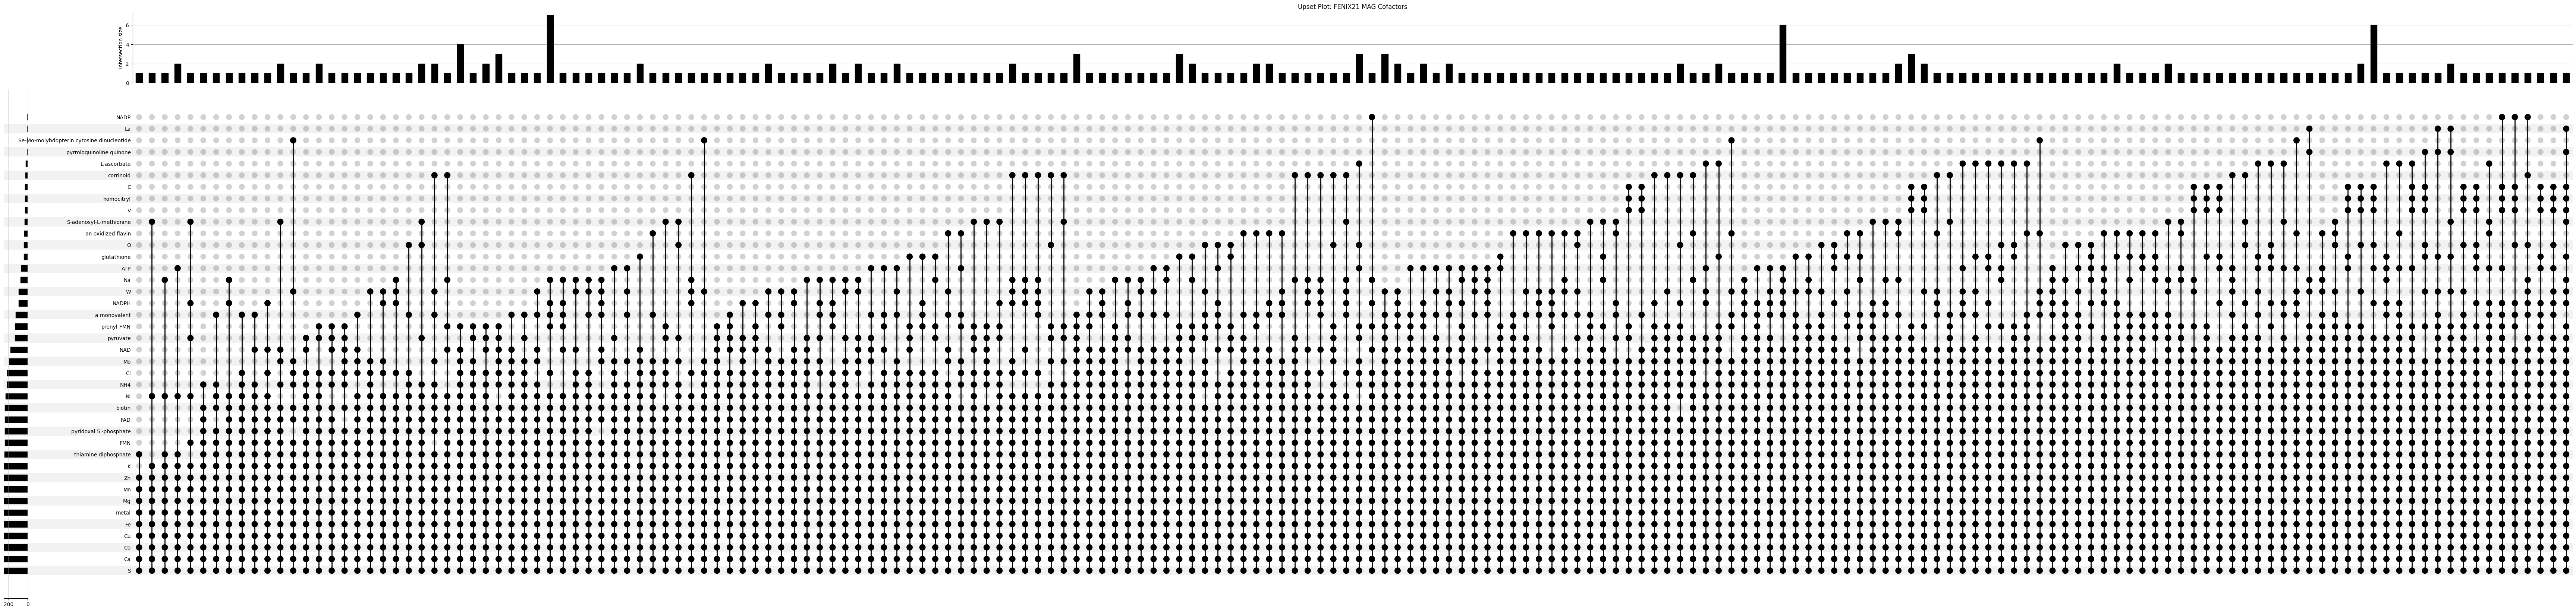

In [6]:
from upsetplot import UpSet, from_memberships
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
df = df.drop("ec", axis=1).dropna()

# Build matrix for cofactor upset plot
cofactor_matrix = df.pivot_table(index='bin_name', columns='cofactor', aggfunc=lambda x:True, fill_value=False)
cofactor_matrix.set_index(cofactor_matrix.columns.tolist(), inplace=True)
cofactor_matrix = cofactor_matrix.groupby(level=list(range(cofactor_matrix.index.nlevels))).size()

upset = UpSet(cofactor_matrix)
upset.plot()
ax = plt.gca()  # Get the current axis to modify
plt.title('Upset Plot: FENIX21 MAG Cofactors')
plt.show()
    # y-axis represents each of our cofactors, x-axis represents the different cases of overlap
    # left-hand bars represent relative abundances of each cofactors across all cases
    # bars above represent how many bins share the same overlap of cofactors

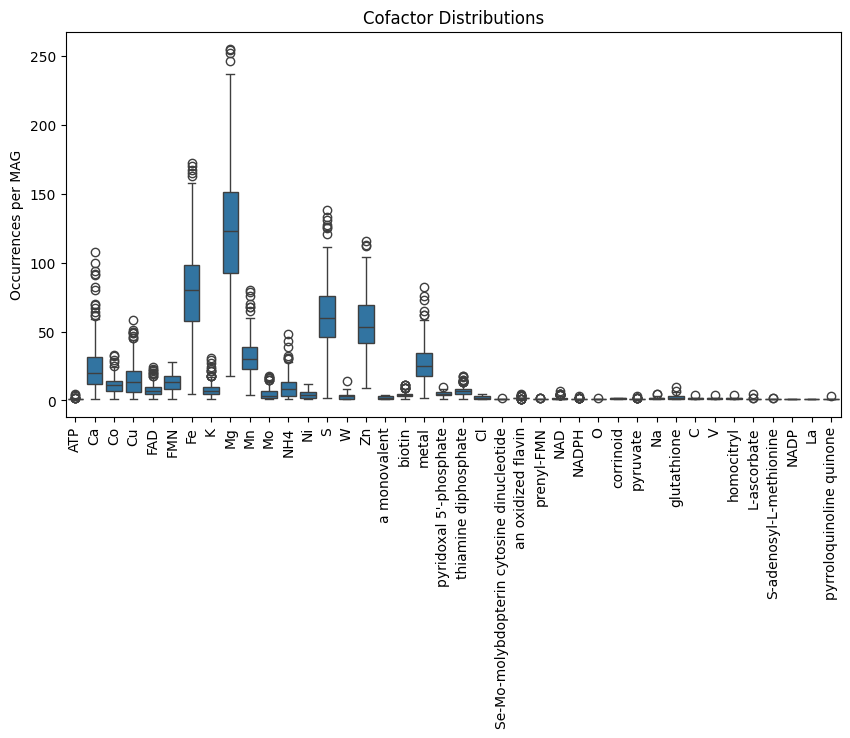

In [25]:
# Count the occurrences of each cofactor per bin
cofactor_counts = df.groupby(['bin_name', 'cofactor']).size().reset_index(name='count')
cofactor_distribution = cofactor_counts.groupby('cofactor')['count'].apply(list).reset_index()

# Convert the data into a long format suitable for seaborn
df_long = cofactor_counts

# Plot the box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='cofactor', y='count', data=df_long)
plt.title('Cofactor Distributions')
plt.xticks(rotation=90) 
plt.xlabel('')
#plt.ylim((0, 20))
plt.ylabel('Occurrences per MAG')
plt.show()

### Fluids vs Seds (bar)

In [30]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

# Splitting into fluids/sediments
seds = data["bin_name"].str.contains("_S_")
sdf = data[seds]
fdf = data[~seds]

print("Cofactor sources:", len(sdf), "sediment-derived,", len(fdf), "fluid-derived")

# Making lists of bin names
bin_names = data["bin_name"].drop_duplicates()
sbn = bin_names[seds]
fbn = bin_names[~seds]

print("MAGs:", len(sbn), "sediment samples,", len(fbn), "fluid samples")

print(sdf.head())
print(fdf.head())

Cofactor sources: 58025 sediment-derived, 66020 fluid-derived
MAGs: 105 sediment samples, 142 fluid samples
                                              bin_name        ec cofactor
574  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Fe
575  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Ca
576  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Cu
577  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Mg
578  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3        S
                                             bin_name         ec cofactor
2   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K
10  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.5.1.19       Zn
11  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  4.2.1.136        K


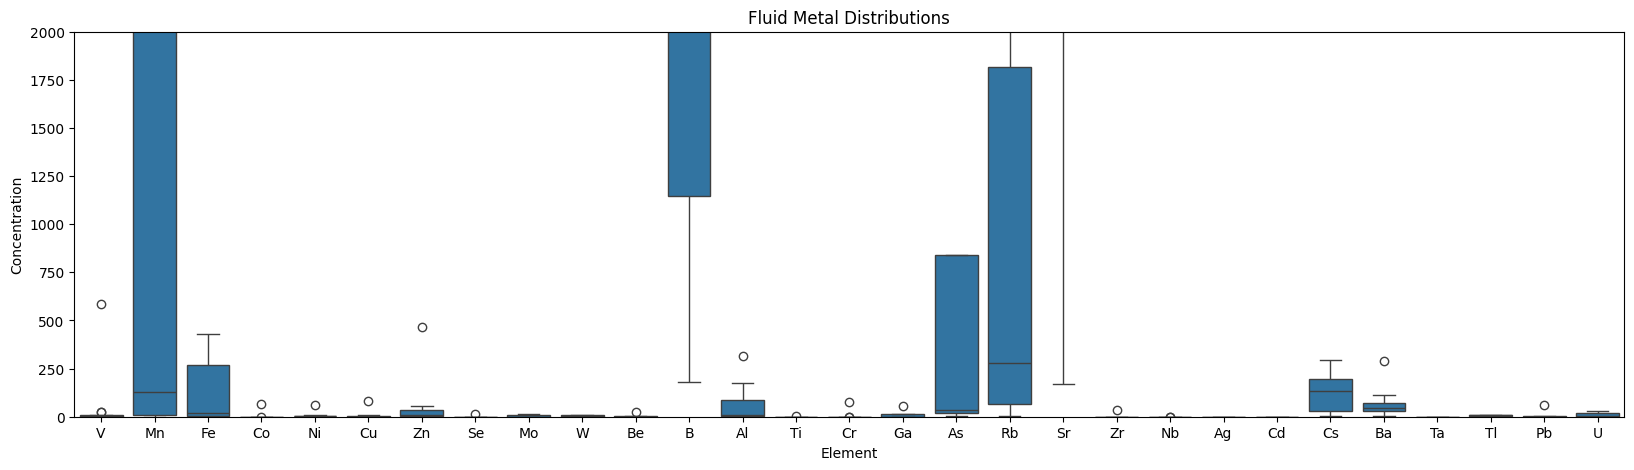

In [92]:
# Fluid metal distributions
# TODO: split into graphs for ppm, ppt, etc

fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
df = fm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

# toggle B (attention to plt.ylim())
b = df_melted["Element"].str.contains("b")
df_nob = df_melted[~b]

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
plt.ylim((0, 2000))
plt.title("Fluid Metal Distributions")
plt.show()

fig = px.box(df_melted, 
    x="Element", 
    y="Concentration", 
    points="all",  # Show all points, including outliers
    hover_data=["SiteID"],  # Display SiteID on hover
    #title="Fluid Metal Distributions (all)",
    template="plotly_white"
)
#fig.update_yaxes(range=[0, 500])

fig.show()

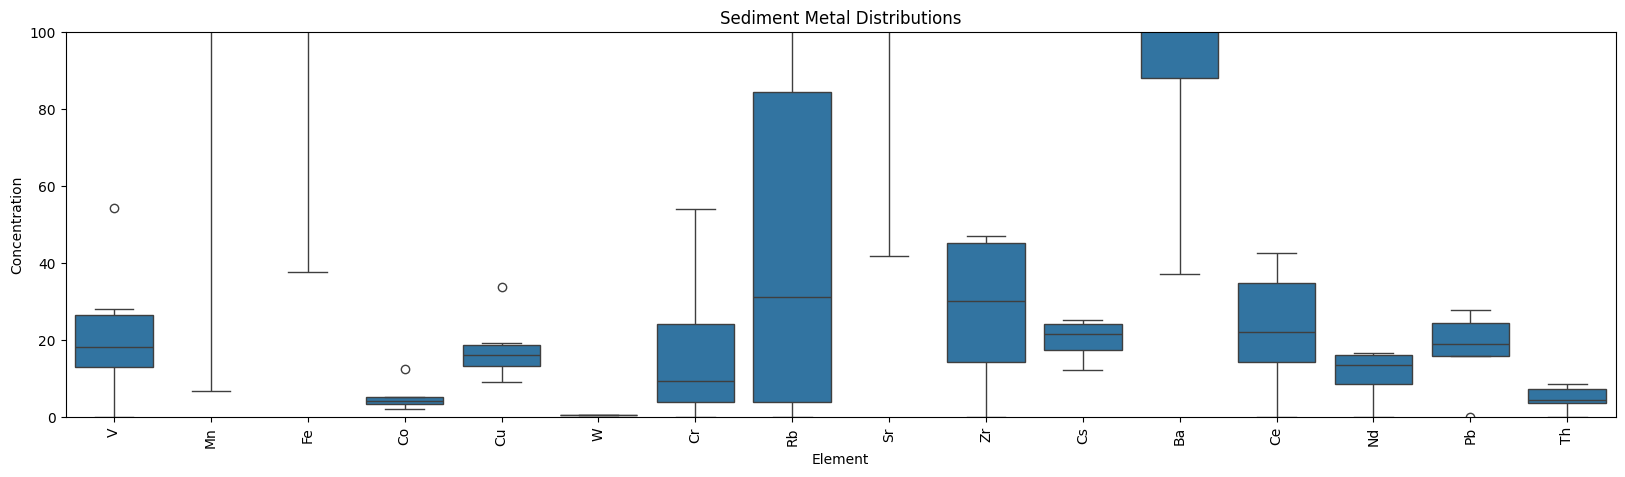

In [32]:
# Sediment metal distributions

sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))
df = sm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
plt.ylim((0, 100)) 
plt.xticks(rotation=90)
plt.title("Sediment Metal Distributions")
plt.show()

fig = px.box(df_melted, 
    x="Element", 
    y="Concentration", 
    points="all",  # Show all points, including outliers
    hover_data=["SiteID"], 
    #title="Sediment Metal Distributions",
    template="plotly_white"
)

fig.show()


### MAGs vs Environment

In [54]:
# Finding entries of cofactors where environmental abundances were measured (metals and ions only)
df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
df = df.dropna()

# Metals and Major Ions from FENIX21 envdata
mi_df = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-ions-list.csv"))
envdata = mi_df["Metals_Ions_FENIX21"].to_list()

# Retrieve overlapping entries
mask = df["cofactor"].isin(envdata)
overlap = df[mask]

print("Initial:", len(df))
print("Overlap:", len(overlap))

#overlap.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors_with_metadata.csv"), index=False)
overlap.head()

Initial: 124045
Overlap: 91890


bin_name         ec cofactor
2   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K
10  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.5.1.19       Zn
11  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  4.2.1.136        K

In [55]:
#TODO: Compare environmental metals against MAG cofactor abundance

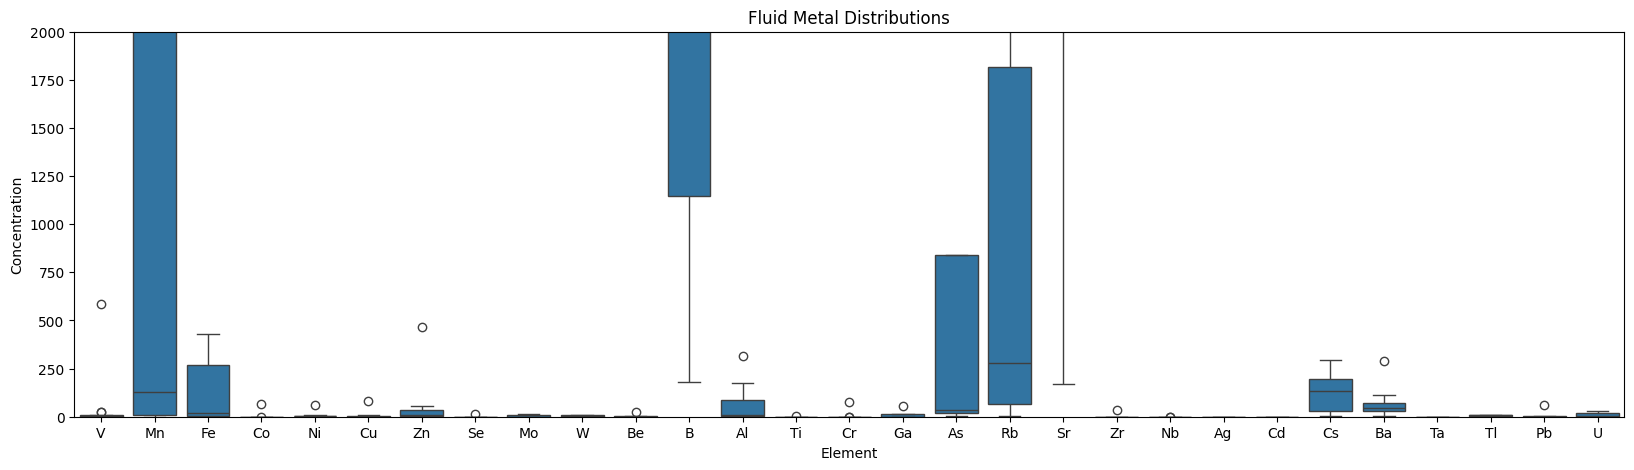

In [90]:
fm_df = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
mi_df = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-ions-list.csv"))

envdata = mi_df["Metals_Ions_Fluids"].dropna().to_list()
filter = fm_df.columns.isin(envdata)
df = fm_df.loc[:, filter]

SiteID = fm_df["SiteID"]
df = df.set_index(SiteID)
df = df.reset_index()

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
plt.ylim((0, 2000))
plt.title("Fluid Metal Distributions")
plt.show()

### Plotting Concentration vs Cofactor Abundance

In [46]:
f_env = pd.read_csv(os.path.join(DATA_DIR, 'MAGs', 'FENIX21', 'envdata.csv'))
f_env = f_env.astype(str)
env_subset = f_env[["SiteID", "site_name", "waterType", "temp", "ph", "spc","sal", "alk_tot"]]
env_subset

SiteID                 site_name waterType   temp    ph    spc     sal  \
0      AS  Acqua sauna lido scoglio       nan   65.0  5.96    nan    36.0   
1      BA                   Bagnone       nan   64.0   7.0    nan     nan   
2      CA             Acqua Cantani   Ca-HCO3  17.48  6.34  2.757    0.14   
3      CF    Terme Caracciolo Forte   Ca-HCO3   53.0  5.36  3.067   0.156   
4      CG            Capasso geyser     Na-Cl   47.2  6.51   9.78   0.528   
5      CP        Capasso parcheggio       nan   46.9   nan  9.932     nan   
6      FE          Sorgente Ferrata   Ca-HCO3  15.22  6.49  1.946     0.1   
7      GA         Grotta dell'acqua     Na-Cl   32.6  6.41    nan    10.0   
8      LS           Lido lo scoglio     Na-Cl   47.8  6.12    nan    21.0   
9      ML       Madonna dei Lattani   Ca-HCO3   15.0   8.6   0.22   0.011   
10     PI           Piccolo Inferno    Ca-SO4   29.5  2.13   3.27   0.169   
11    SI1     Hotel Sinuessa anfora     Na-Cl   34.0  5.98  6.555   7.732   
12    SI2       Hotel Sinuess pozzo     Na-Cl   44.0  6.27    7.8   9.342   
13     SN           Stufe di Nerone     Na-Cl   63.0   6.1    nan    21.0   
14    SP1         Sorgente Petrinum       nan   35.0   6.1  5.888    6.88   
15    SP2         Sorgente Petrinum   Ca-HCO3   32.5   6.2    0.7   0.055   
16     SS      Hotel Sinuess strada       nan   50.3  6.04  8.575  10.356   
17     VR                  Varchera    Ca-SO4   14.0  5.98    nan     5.0   

   alk_tot  
0      nan  
1      nan  
2   1200.0  
3   1400.0  
4   1400.0  
5      nan  
6    800.0  
7    800.0  
8    600.0  
9    200.0  
10     0.0  
11  1000.0  
12  1400.0  
13   400.0  
14     nan  
15  2000.0  
16     nan  
17  1000.0

In [182]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()
fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))

SITES = fm["SiteID"].to_list()
print(SITES)

['AS', 'BA', 'CA', 'CF', 'CG', 'CP', 'FE', 'GA', 'LS', 'ML', 'PI', 'SI1', 'SI2', 'SN', 'SP1', 'SP2', 'SS', 'VR']


In [82]:
# Get site-specific cofactors
SITE = "CG"
SiteID = data["bin_name"].str.contains(f"{SITE}_S") # Change string HERE to view different sites/fluids/seds, e.g., "GA_F", "CA_S", etc
filtered = data[SiteID]
cofactors_df = filtered.rename(columns={"cofactor": "Metal"})
cofactors_df = cofactors_df.value_counts("Metal").reset_index()

# Get metal concentrations
df = fm.drop('ExpID', axis=1)
df = df.set_index('SiteID').T
df = df.reset_index()
df = df.rename(columns={"index": "Metal"})

# Subset for specific site
abundances_df = df[["Metal", SITE]] 

# Merge in prep for visualization
combined_df = pd.merge(cofactors_df, abundances_df, on='Metal')
combined_df

Metal  count        CG
0    Fe    407  3.424000
1    Zn    276  3.086333
2    Mn    149  4.391000
3    Cu     79  5.164333
4    Co     53  0.017000
5    Mo     26  0.057000
6    Ni     15  1.653000
7     W      9  3.343000
8     V      2  0.098000

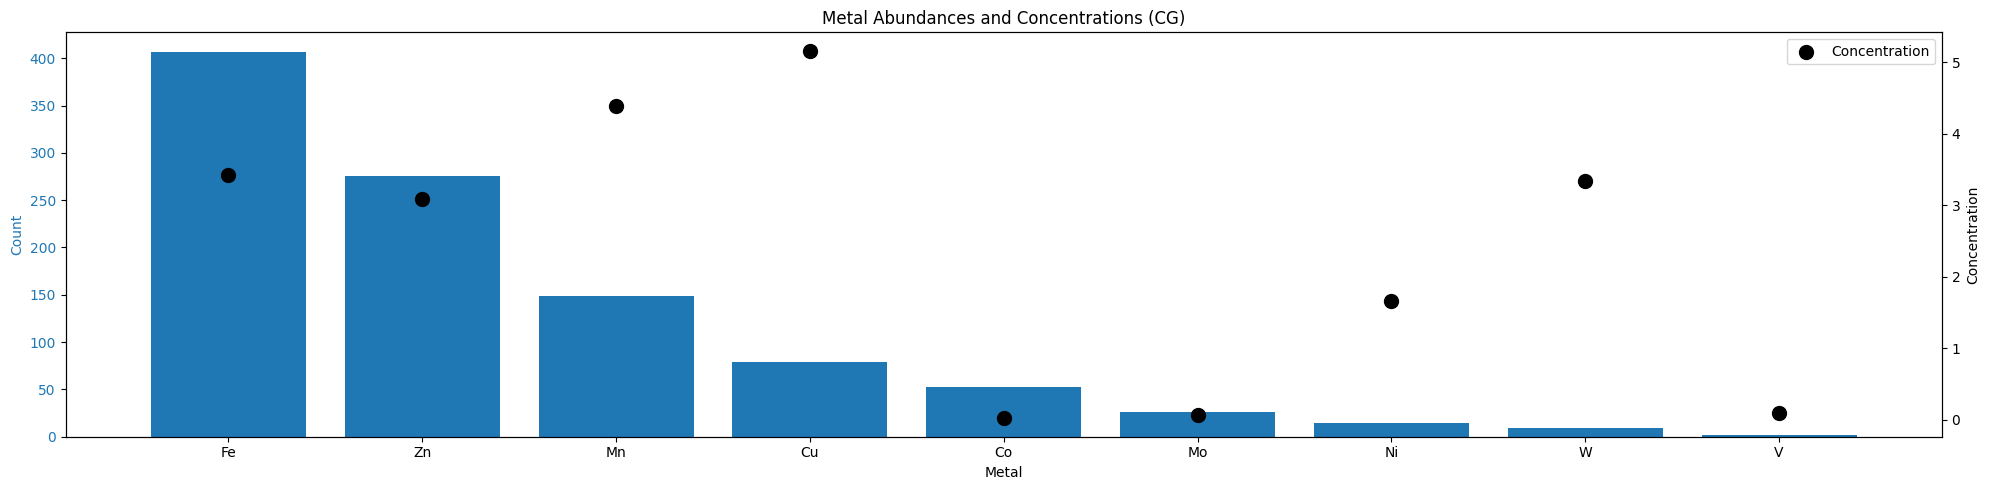

In [83]:
df = combined_df
fig, ax1 = plt.subplots(figsize=(20, 5))

# Bar plot for 'count'
color = 'tab:blue'
ax1.set_xlabel('Metal')
ax1.set_ylabel('Count', color=color)
ax1.bar(df['Metal'], df['count'], color=color, label='Count')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for <SiteID>
ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel('Concentration', color=color)
ax2.scatter(df['Metal'], df[SITE], color=color, label='Concentration', s=100, marker='o') # CHANGE
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f'Metal Abundances and Concentrations ({SITE})') # CHANGE
fig.tight_layout()  # Ensure the layout fits well 

# Optionally, add a legend
#ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
#TODO: a figure with box-whiskers of each metal's distribution based on site and the same with the range of cofactor counts

## Comparing Clusters

In [195]:
ml_output = pd.read_csv(os.path.join(DATA_DIR, "model", "ml-model-output.csv"))

#df = ml_output.drop(ml_output.columns[0:32], axis=1)
df = ml_output[["taxon_id", "Test Cluster", "RF Classify", "KNN Classify", "neighbor_taxon_id", "neighbor_media_id"]]
df = df.rename(columns={
    "taxon_id": "bin_name", 
    "Test Cluster": "KM_cluster",
    "RF Classify": "RF_cluster",
    "KNN Classify": "KN_cluster"
})
df.head()

bin_name  KM_cluster  RF_cluster  \
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...          61          61   
1  KBase_derived_Bin.001.fastaBA_F_extracted_bins...          61          61   
2  KBase_derived_Bin.001.fastaBA_F_extracted_bins...          61          61   
3  KBase_derived_Bin.001.fastaBA_F_extracted_bins...          61          61   
4  KBase_derived_Bin.001.fastaBA_F_extracted_bins...          61          61   

   KN_cluster  neighbor_taxon_id neighbor_media_id  
0          61           370524.0              J386  
1          61           146021.0              J386  
2          61            89053.0              215b  
3          61          2606448.0              J386  
4          61           181070.0              J386

In [199]:
df_combined = df.groupby('bin_name', as_index=False).agg({
    'KM_cluster': lambda x: list(set(x)),
    'RF_cluster': lambda x: list(set(x)),
    'KN_cluster': lambda x: list(set(x))
})

def combine_clusters(row):
    combined_set = set(row['KM_cluster'] + row['RF_cluster'] + row['KN_cluster'])
    return ', '.join(map(str, sorted(combined_set)))

df_combined['clusters'] = df_combined.apply(combine_clusters, axis=1)
df_combined = df_combined.drop(columns=['KM_cluster', 'RF_cluster', 'KN_cluster'])
df_combined

bin_name  clusters
0    KBase_derived_Bin.001.fastaBA_F_extracted_bins...        61
1    KBase_derived_Bin.001.fastaBA_S_extracted_bins...        61
2    KBase_derived_Bin.001.fastaCF_F_extracted_bins...        14
3    KBase_derived_Bin.001.fastaCG_S_extracted_bins...        61
4    KBase_derived_Bin.001.fastaFE_F_extracted_bins...        61
..                                                 ...       ...
242  KBase_derived_Bin.033.fastaLS_S_extracted_bins...        61
243  KBase_derived_Bin.034.fastaCA_F_extracted_bins...  137, 177
244  KBase_derived_Bin.037.fastaLS_S_extracted_bins...   14, 137
245  KBase_derived_Bin.038.fastaLS_S_extracted_bins...        61
246  KBase_derived_Bin.039.fastaLS_S_extracted_bins...        14

[247 rows x 2 columns]

# End